In [ ]:
import torch
from model import LiteNet
import numpy as np


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LiteNet(num_classes=8).to(device)
model.load_state_dict(torch.load("Oracle_LiteNet.pth", map_location=device))
model.to(device)
model.eval()
train_data_npy = np.load(f"CICIDS2017/train.npy")


random_indices = np.random.choice(len(train_data_npy), size=5000, replace=False)
train_data_npy = train_data_npy[random_indices]

In [8]:
train_data_npy[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.20000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.55350000e+04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.71958666e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.19200000e+03, 2.06350399e+00, 5.81535100e+06, 5.78990800e+06,
       1.93845033e+06, 1.83000000e+02, 3.33548375e+06, 6.87834664e-01,
       2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.20000000e+01,
       5.78990800e+06, 2.90767550e+06, 2.54430000e+04, 4.07609229e+06,
       5.81535100e+06, 0.00000000e+00, 6.00000000e+00, 4.00000000e+00,
       0.00000000e+00, 3.46410162e+00, 0.00000000e+00, 5.15875998e-01,
       2.00000000e+01, 4.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [4]:
import shap

shap.initjs()

background = torch.from_numpy(train_data_npy).to(device)
explainer = shap.GradientExplainer(model, background)

print("Calculating SHAP values... (This may take a while)")
shap_values = explainer.shap_values(background)
print("Done")

/home/afifhaziq/CLiteNet/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Calculating SHAP values... (This may take a while)
Done


In [5]:
feature_name = ['ACK Flag Count', 'Active Max', 'Active Mean', 'Active Min', 'Active Std', 'Average Packet Size', 'Bwd Bulk Rate Avg', 'Bwd Bytes/Bulk Avg', 'Bwd Header Length', 'Bwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Total', 'Bwd Init Win Bytes', 'Bwd PSH Flags', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Min', 'Bwd Packet Length Std', 'Bwd Packet/Bulk Avg', 'Bwd Packets/s', 'Bwd Segment Size Avg', 'Bwd URG Flags', 'CWR Flag Count', 'Down/Up Ratio', 'ECE Flag Count', 'FIN Flag Count', 'FWD Init Win Bytes', 'Flow Bytes/s', 'Flow Duration', 'Flow IAT Max', 'Flow IAT Mean', 'Flow IAT Min', 'Flow IAT Std', 'Flow Packets/s', 'Fwd Act Data Pkts', 'Fwd Bulk Rate Avg', 'Fwd Bytes/Bulk Avg', 'Fwd Header Length', 'Fwd IAT Max', 'Fwd IAT Mean', 'Fwd IAT Min', 'Fwd IAT Std', 'Fwd IAT Total', 'Fwd PSH Flags', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Min', 'Fwd Packet Length Std', 'Fwd Packet/Bulk Avg', 'Fwd Packets/s', 'Fwd Seg Size Min', 'Fwd Segment Size Avg', 'Fwd URG Flags', 'Idle Max', 'Idle Mean', 'Idle Min', 'Idle Std', 'PSH Flag Count', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Min', 'Packet Length Std', 'Packet Length Variance', 'RST Flag Count', 'SYN Flag Count', 'Subflow Bwd Bytes', 'Subflow Bwd Packets', 'Subflow Fwd Bytes', 'Subflow Fwd Packets', 'Total Bwd packets', 'Total Fwd Packet', 'Total Length of Bwd Packet', 'Total Length of Fwd Packet', 'URG Flag Count']

/tmp/ipykernel_664947/3576922572.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_value_global, background.cpu().numpy(), max_display=20, feature_names=feature_name)


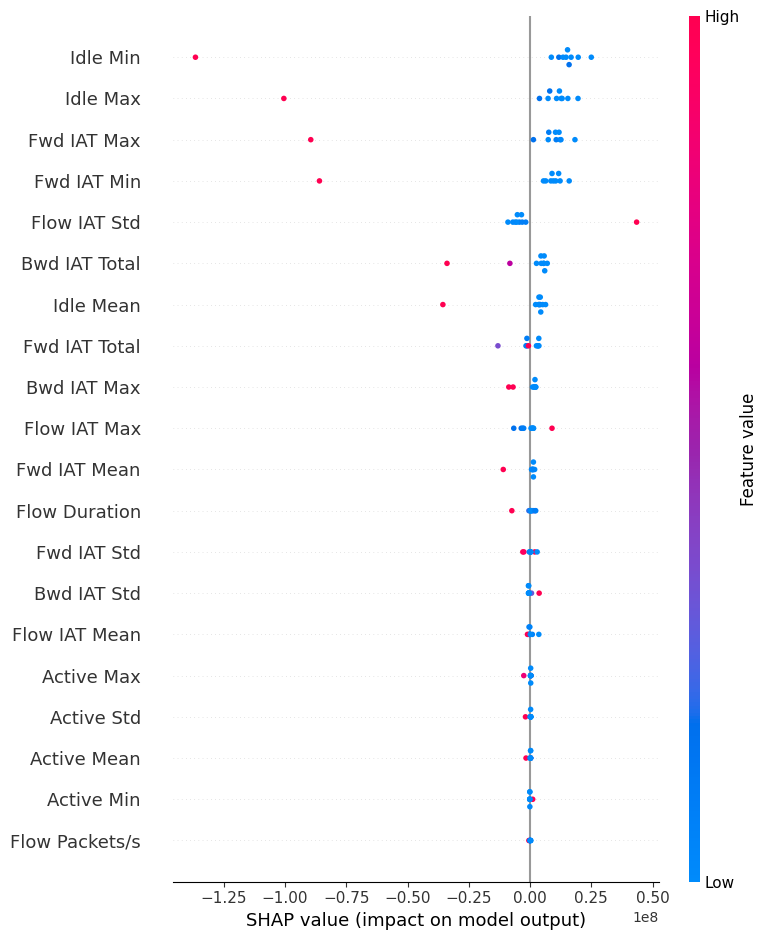

In [6]:
shap_value_global = shap_values.mean(axis=2)

shap.summary_plot(shap_value_global, background.cpu().numpy(), max_display=20, feature_names=feature_name)